---

**Andy Edinger**   
**Date:** October 10, 2024  
**Email:** [aedinge@iu.edu](mailto:aedinge@iu.edu)

---
This notebook contains the analysis for: "Cognitive distortions in political polarization" by Andy Edinger, Johan Bollena, Hernán A. Makse, and Matteo Serafino.
---

#### Bootstrapped CDS Prevalence - Fig. 2

Bootstrapped prevalence ratios over all tweets by each cohort, separated by CDS n-gram type. This analysis requires 2 large ("231109_all_variants_2016.csv", "231109_all_variants_2020.csv") files of CDS category breakdown over all tweets that is not included in the git repo due to file size. These 2 intermediate files can be produced from raw data in the "cds_prevalence.ipynb" notebook, with raw data available upon request.

In [14]:
import pandas as pd
import json
import __CDS__
import matplotlib.pyplot as plt

data_fldr = "raw_data"


Read in raw user data and CDS counts

In [13]:
with open(data_fldr + "users_2016_activity.txt") as f:
    users_2016 = json.load(f)
    
with open(data_fldr + "users_2020_activity.txt") as f:
    users_2020 = json.load(f)

users_2016 = {int(key):val for key,val in users_2016.items()}
users_2020 = {int(key):val for key,val in users_2020.items()}

# include only users with >10 tweets in both 2016 and 2020
long_users = [user for user in set(users_2016.keys()).intersection(set(users_2020.keys())) if users_2016[user]>10 and users_2020[user]>10]

# per-tweet CDS analysis
tweets_2020 = pd.read_csv(data_fldr + "231109_all_variants_2020.csv", index_col = "Unnamed: 0", lineterminator='\n')
tweets_2016 = pd.read_csv(data_fldr + "231109_all_variants_2016.csv", index_col = "Unnamed: 0", lineterminator='\n')

# Get counts of each CDS type for each user
user_ct_2020 = tweets_2020.groupby('user_id').sum()
user_ct_2016 = tweets_2016.groupby('user_id').sum()

# Get total tweets for each user
user_ct_2020['total_tweets'] = pd.Series(users_2020)
user_ct_2016['total_tweets'] = pd.Series(users_2016)

In [ ]:
tweets_2020

Data summarizations for manuscript:

In [20]:
# count tweets for users that meet inclusions criteria for both 2016 and 2020
print("2016 tweets: ", sum([users_2016[key] for key in long_users]))
print("2020 tweets: ", sum([users_2020[key] for key in long_users]))

# CDS types
cols = ['CDS', 'Labeling and mislabeling', 'Catastrophizing',
       'Dichotomous Reasoning', 'Emotional Reasoning',
       'Disqualifying the Positive', 'Magnification and Minimization',
       'Mental Filtering', 'Mindreading', 'Fortune-telling',
       'Overgeneralizing', 'Personalizing', 'Should statements', 'total_tweets']

# print CDS types, frequencies, and prevalence with output formatting for latex
for col in cols:
    n16 = user_ct_2016[col].sum()
    p16 = user_ct_2016[col].sum()/user_ct_2016['total_tweets'].sum()*100
    n20 = user_ct_2020[col].sum()
    p20 = user_ct_2020[col].sum()/user_ct_2020['total_tweets'].sum()*100
    print(col, f"& {n16} ({round(p16, 3)}) & {n20} ({round(p20, 2)}) & ")


CDS 2311825 (17.282) & 2973513 (25.09) & 
Labeling and mislabeling 210160 (1.571) & 246603 (2.08) & 
Catastrophizing 7954 (0.059) & 12443 (0.1) & 
Dichotomous Reasoning 1486776 (11.115) & 2066595 (17.44) & 
Emotional Reasoning 472 (0.004) & 987 (0.01) & 
Disqualifying the Positive 8136 (0.061) & 10756 (0.09) & 
Magnification and Minimization 146609 (1.096) & 190099 (1.6) & 
Mental Filtering 1639 (0.012) & 2068 (0.02) & 
Mindreading 158970 (1.188) & 240695 (2.03) & 
Fortune-telling 49724 (0.372) & 61884 (0.52) & 
Overgeneralizing 34812 (0.26) & 61132 (0.52) & 
Personalizing 13774 (0.103) & 20297 (0.17) & 
Should statements 498935 (3.73) & 652223 (5.5) & 
total_tweets 13376733 (100.0) & 11852917 (100.0) & 


# Bootstrap resampling:

In [ ]:
pr_cols = ['CDS', 'Labeling and mislabeling', 'Catastrophizing', 'Dichotomous Reasoning', 'Emotional Reasoning',
       'Disqualifying the Positive', 'Magnification and Minimization',
       'Mental Filtering', 'Mindreading', 'Fortune-telling',
       'Overgeneralizing', 'Personalizing', 'Should statements']

user_ct_2020[pr_cols] = (user_ct_2020[pr_cols].div(user_ct_2020["total_tweets"], axis="index"))
user_ct_2016[pr_cols] = (user_ct_2016[pr_cols].div(user_ct_2016["total_tweets"], axis="index"))

Run and save 10k bootstrap resamples of users

In [144]:
num_runs = 10000

bootstrap_w_20 = pd.DataFrame(columns=pr_cols)
bootstrap_w_16 = pd.DataFrame(columns=pr_cols)

for i in range(num_runs):
    
    if(i%100)==0:
        print(i)
    
    bootstrap_w_20.loc[i, :] = user_ct_2020.sample(n=user_ct_2020.index.size, random_state=rs, replace=True)[pr_cols].mean()
    bootstrap_w_20.loc[i, :] = user_ct_2020[cols].sample(n=user_ct_2020.index.size, random_state=rs, replace=True).sum()

    bootstrap_w_16.loc[i, :] = user_ct_2016.sample(n=user_ct_2016.index.size, random_state=rs, replace=True)[pr_cols].mean()

bootstrap_w_20.to_csv(data_fldr + "231110_users_20_bs.csv")
bootstrap_w_16.to_csv(data_fldr + "231110_users_16_bs.csv")

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


## Read in bootstrap results - start here to avoid re-running the bootstrap resampling

In [8]:
data_fldr = "intermediate_data/"

bootstrap_w_20 = pd.read_csv(data_fldr + "231110_users_20_bs.csv")
bootstrap_w_16 = pd.read_csv(data_fldr + "231110_users_16_bs.csv")

In [9]:
#prevalence ratios
pr_cols = ['CDS', 'Labeling and mislabeling', 'Catastrophizing', 'Dichotomous Reasoning', 'Emotional Reasoning',
       'Disqualifying the Positive', 'Magnification and Minimization',
       'Mental Filtering', 'Mindreading', 'Fortune-telling',
       'Overgeneralizing', 'Personalizing', 'Should statements']

prs = pd.DataFrame()

for col in pr_cols:
    prs[col] = (bootstrap_w_20[col]/bootstrap_w_16[col])

meds = prs.median()
meds.sort_values(ascending=True, inplace=True)
prs = prs[meds.index]

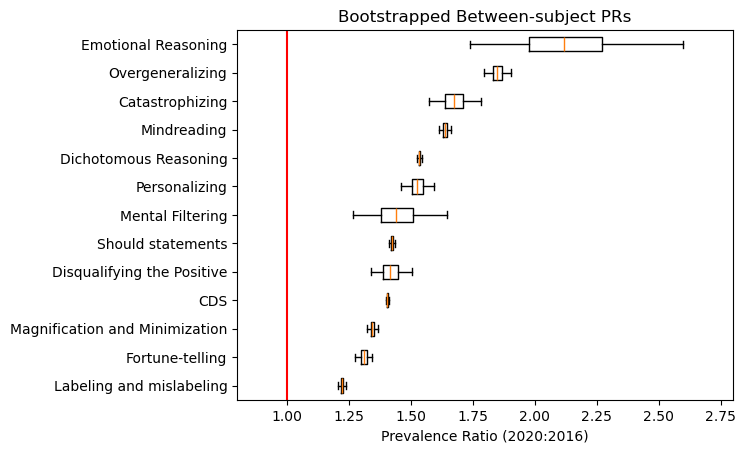

In [10]:
fig1, ax1 = plt.subplots()

ax1.boxplot(prs, vert=False, showfliers=False, whis=(2.5,97.5))

ax1.set_yticklabels(prs.columns)
ax1.set_xlim([0.8,2.8])

plt.xlabel("Prevalence Ratio (2020:2016)")
plt.title("Bootstrapped Between-subject PRs")
plt.axvline(1, color='r')